# 資料匯入及預處理

In [84]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


source : https://www.kaggle.com/c/kfru-dbm-hr-analytics

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",25) #設定pandas最多顯示出25個欄位資訊
df = pd.read_csv("HR_comma_sep.csv",encoding = "big5") #15000筆
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
3803,0.69,0.93,3,233,3,0,0,0,IT,medium
14343,0.90,1.00,5,221,5,0,1,0,support,low
1188,0.09,0.80,5,279,4,0,1,0,technical,low
5404,0.52,0.70,4,247,5,0,0,0,IT,medium
4786,0.73,0.93,4,162,2,1,0,0,support,medium


satisfaction_level：滿意度（0-1）<br />
last_evaluation：自上次評估以來的年數<br />
number_project：已完成計畫的數量<br />
average_monthly_hours：平均每月工作時間<br />
time_spent_company：待在公司的年數<br />
work_accident：上班時有意外嗎？<br />
promotion_last_5years：過去五年有過升職嗎？<br />
dept：正在處理的部門<br />
salary：相對工資水平<br />
left：還在職嗎？

In [6]:
# one hot encoding
df_job = pd.get_dummies(df['dept'])
df_job.sample(5)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
10392,0,0,0,0,0,0,0,1,0,0
10737,0,0,0,0,0,0,0,0,1,0
12610,0,0,0,0,0,1,0,0,0,0
8824,0,0,0,0,0,0,0,0,1,0
6052,0,0,0,0,0,0,0,1,0,0


In [9]:
df_ml = pd.merge(df.drop("dept",axis = 1), df_job,left_index=True,right_index=True)
df_ml.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
5732,0.67,0.89,2,173,3,0,0,0,low,0,0,0,0,0,1,0,0,0,0
4810,0.78,0.87,4,264,3,0,0,0,medium,0,0,1,0,0,0,0,0,0,0
5071,0.69,0.74,4,237,3,0,0,0,low,0,0,0,0,0,0,0,0,0,1
4347,0.14,0.51,4,253,6,0,0,0,medium,0,1,0,0,0,0,0,0,0,0
1842,0.38,0.51,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


In [12]:
# label encoding 由於salary有數值上的趨勢 所以可以使用1 2 3
df_ml['salary_rank'] = df_ml['salary'].replace({'low':1,'medium':2,'high':3})
df_ml.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_rank
9818,0.62,0.52,6,253,4,0,0,0,medium,0,0,0,0,0,0,0,0,1,0,2
12855,0.22,0.54,6,169,4,0,0,0,low,0,0,0,0,0,0,0,0,0,1,1
2299,0.38,0.44,3,137,3,0,0,0,medium,0,0,0,0,0,0,0,1,0,0,2
9054,0.64,0.77,3,249,2,1,0,0,low,0,0,0,0,0,0,0,0,1,0,1
12971,0.59,0.97,3,257,3,0,0,0,low,0,0,0,0,0,1,0,0,0,0,1


In [13]:
# 清除na
df_ml = df_ml.dropna().reset_index(drop=True)

In [22]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(["salary","left"],axis = 1)
y = df_ml['left']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


# PART I :單個分類器

## 決策樹

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree = DecisionTreeClassifier(criterion = "entropy",max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
label = ["0","1"]
tree_mat = metrics.confusion_matrix(y_test, tree.predict(X_test))
print(metrics.classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3430
           1       0.96      0.92      0.94      1070

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

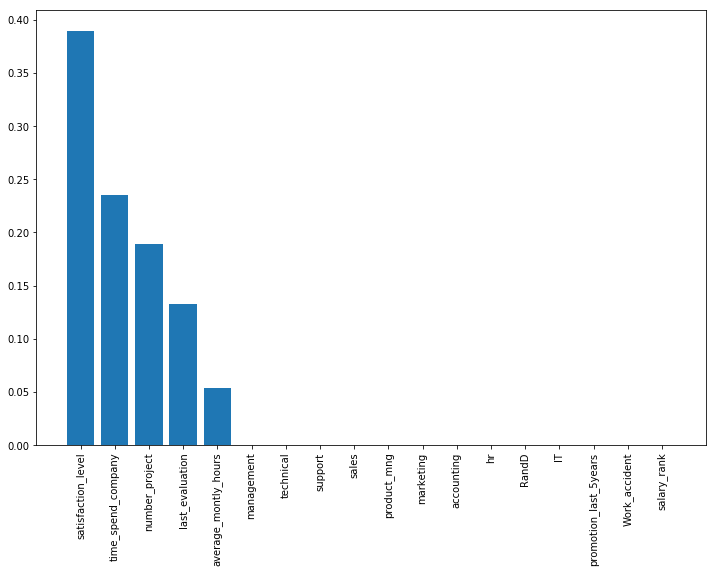

In [54]:
tree_feature = pd.DataFrame(tree.feature_importances_,index = X.columns,columns = ["importance"])
tree_feature = tree_feature.reset_index(drop = False).sort_values(by = "importance",ascending = False).reset_index(drop = True)
tree_feature
fig = plt.figure(figsize=(12,8))
plt.bar(tree_feature["index"],tree_feature["importance"])
plt.xticks(fontsize = 10,rotation = 90)

## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, knn.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3430
           1       0.92      0.91      0.91      1070

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



## SVC

In [67]:
from sklearn.svm import SVC

svc = SVC(C=5, kernel="rbf")
svc.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, svc.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3430
           1       0.91      0.90      0.91      1070

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



# 投票法 Voting Classifier

In [72]:
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier(max_depth=5)
clf2 = KNeighborsClassifier(n_neighbors=2)
clf3 = SVC(C = 5, kernel='rbf',probability=True) #probability要設成True(同時計算每個分類的機率)，才能具體計算投票的數值

eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),('svc', clf3)], voting='soft', weights=[3, 1, 1])
eclf.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, eclf.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3430
           1       0.97      0.92      0.95      1070

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



# 裝袋法  Bagging

In [75]:
# 基於決策術所以可以不用標準化
from sklearn.ensemble import BaggingClassifier

bagc = BaggingClassifier(n_estimators=100, oob_score=True)
bagc.fit(X,y)
print("oob_score(accuary):",bagc.oob_score_)
print(metrics.confusion_matrix(y_test, bagc.predict(X_test)))
print(metrics.classification_report(y_test, bagc.predict(X_test)))

oob_score(accuary): 0.991132742183
[[3430    0]
 [   2 1068]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3430
           1       1.00      1.00      1.00      1070

   micro avg       1.00      1.00      1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



# 隨機森林 random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,max_depth = 25)
rfc.fit(X_train,y_train)

print(metrics.confusion_matrix(y_test,rfc.predict(X_test)))
print(metrics.classification_report(y_test, rfc.predict(X_test)))

[[3422    8]
 [  47 1023]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3430
           1       0.99      0.96      0.97      1070

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

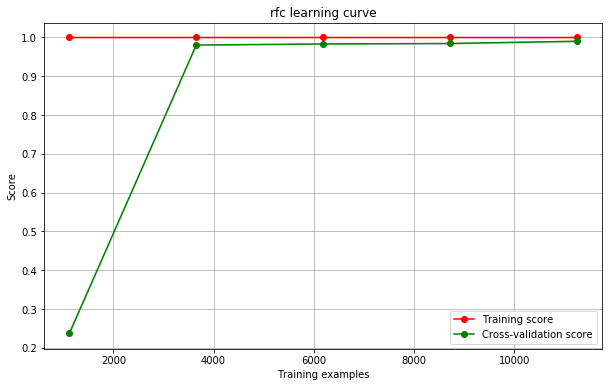

In [94]:
# 檢視學習曲線 檢查建模有無問題
from sklearn.model_selection import KFold,StratifiedKFold

cv = KFold(n_splits=4, random_state=None, shuffle=True)
plot_learning_curve(rfc, "rfc learning curve", X, y.values.ravel(), cv=cv,
                         train_sizes=np.linspace(.1, 1.0, 5))

In [92]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=150)
adb.fit(X_train, y_train)
print(metrics.confusion_matrix(y_test,adb.predict(X_test)))
print(metrics.classification_report(y_test, adb.predict(X_test)))

[[3361   69]
 [ 105  965]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3430
           1       0.93      0.90      0.92      1070

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.95      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500



<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

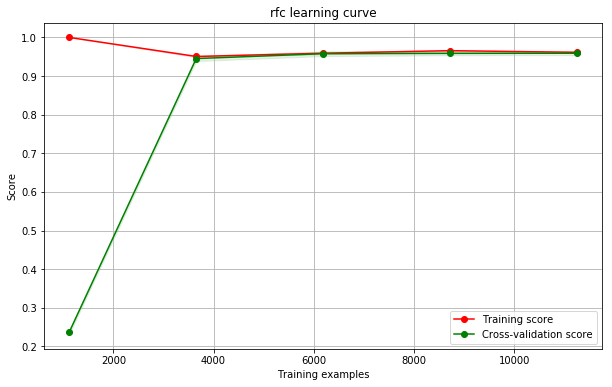

In [93]:
from sklearn.model_selection import KFold,StratifiedKFold

cv = KFold(n_splits=4, random_state=None, shuffle=True)
plot_learning_curve(adb, "rfc learning curve", X, y.values.ravel(), cv=cv,
                         train_sizes=np.linspace(.1, 1.0, 5))